In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
from matplotlib import pyplot as plt

tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
data_dir = r'data'
os.listdir(data_dir)
# os.listdir(os.path.join(data_dir, 'crazing'))

['crazing', 'scratches']

In [3]:
data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                   image_size=(200, 200),
                                                   batch_size=32)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 480 files belonging to 2 classes.


In [4]:
batch = data_iterator.next()

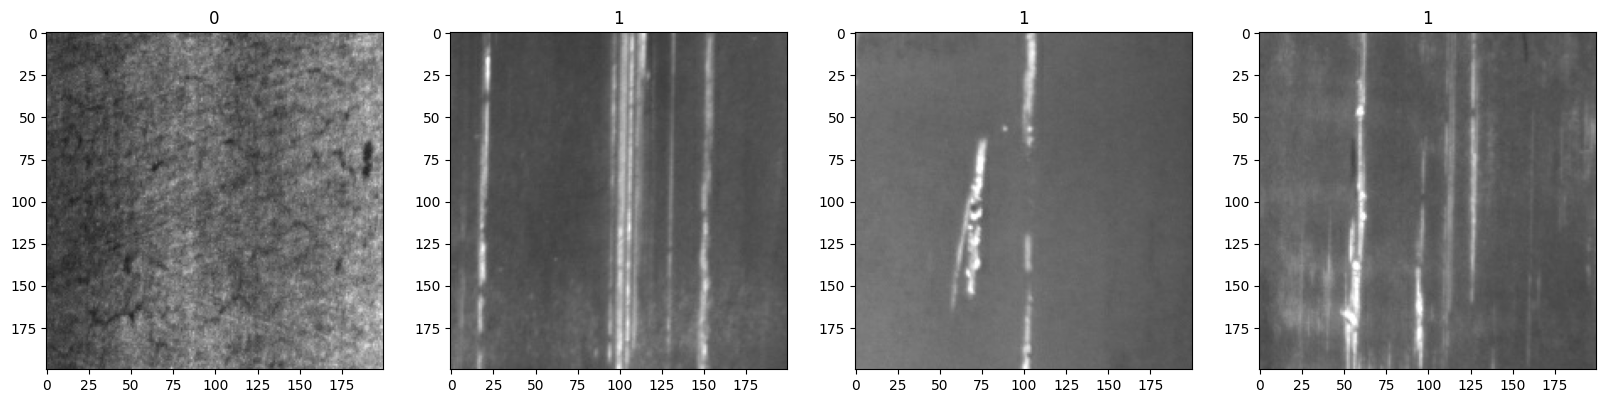

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocessing

In [6]:
# SCALE DATA
data = data.map(lambda x, y: (x/255.0, y))

In [7]:
scaled_interator = data.as_numpy_iterator()

In [8]:
## SPLIT DATA

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [9]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Building the Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='softmax', input_shape=(200,200,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='softmax'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='softmax'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='softmax'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='softmax'))
model.add(Dense(1, activation='softmax'))

In [23]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [24]:
# model.summary()

Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 2s 93ms/step - loss: nan - accuracy: 0.5031 - val_loss: nan - val_accuracy: 0.5625
Epoch 2/20
10/10 [==============================] - 1s 84ms/step - loss: nan - accuracy: 0.5312 - val_loss: nan - val_accuracy: 0.4271
Epoch 3/20
10/10 [==============================] - 1s 84ms/step - loss: nan - accuracy: 0.4906 - val_loss: nan - val_accuracy: 0.4583
Epoch 4/20
10/10 [==============================] - 1s 84ms/step - loss: nan - accuracy: 0.4719 - val_loss: nan - val_accuracy: 0.3854
Epoch 5/20
10/10 [==============================] - 1s 78ms/step - loss: nan - accuracy: 0.4969 - val_loss: nan - val_accuracy: 0.5104
Epoch 6/20
10/10 [==============================] - 1s 81ms/step - loss: nan - accuracy: 0.5031 - val_loss: nan - val_accuracy: 0.4583
Epoch 7/20
10/10 [==============================] - 1s 82ms/step - loss: nan - accuracy: 0.5031 - val_loss: nan - val_accuracy: 0.4375
Epoch 8/20
10/10 [==============================] - 1s 

Plot Performance

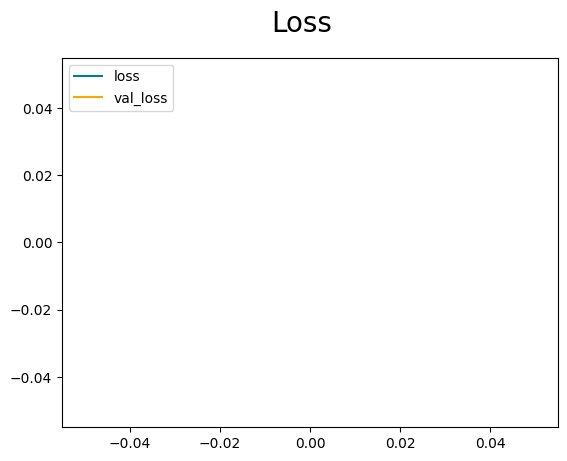

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

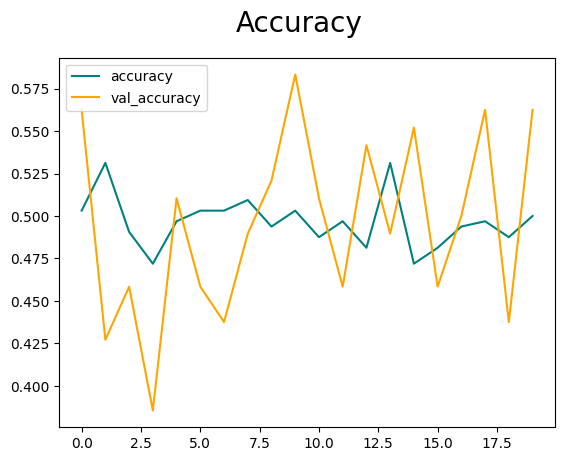

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate